In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Electricity Connections.csv


In [2]:
#importing the data
df=pd.read_csv("/kaggle/input/Electricity Connections.csv")

In [3]:
df.head()

,Districts,Domestic Connections,Industrial Connections,Agriculture Connections,Commercial Connections,Other Connections
0,ADILABAD,151936,1074,17948,14641,3302
1,BHADRADRI,272987,1396,29951,25990,5911
2,HYDERABAD,1469633,13041,86,324781,18987
3,JAGTIAL,267097,2132,113165,23109,6499
4,JANGAON,148566,1536,80002,11366,4432


In [4]:
df.tail()

,Districts,Domestic Connections,Industrial Connections,Agriculture Connections,Commercial Connections,Other Connections
26,VIKARABAD,178574,3063,51409,15044,2685
27,WANAPARTHY,108511,1194,37317,11195,2362
28,WARANGAL (R),147718,1576,67698,12536,3056
29,WARANGAL (U),366159,3275,41144,47177,5205
30,YADADRI,191627,3011,85404,20708,5033


In [5]:
###Data Sanity Checks

In [6]:
#checking the shape of the dataset
df.shape

(31, 6)

In [7]:
#checking the missing values
df.isnull().sum()

Districts                  0
Domestic Connections       0
Industrial Connections     0
Agriculture Connections    0
Commercial Connections     0
Other Connections          0
dtype: int64

In [8]:
#checking duplicate values
df.duplicated().sum()

0

In [9]:
#dropping duplicates
df.drop_duplicates()


,Districts,Domestic Connections,Industrial Connections,Agriculture Connections,Commercial Connections,Other Connections
0,ADILABAD,151936,1074,17948,14641,3302
1,BHADRADRI,272987,1396,29951,25990,5911
2,HYDERABAD,1469633,13041,86,324781,18987
3,JAGTIAL,267097,2132,113165,23109,6499
4,JANGAON,148566,1536,80002,11366,4432
5,JAYASHANKAR,144768,1053,48042,9719,3377
6,JOGULAMBA,92452,1020,31602,9403,1907
7,KAMAREDDY,210720,2206,82132,19376,6364
8,KARIMNAGAR,309030,3512,91361,33644,6290
9,KHAMMAM,397024,3193,81374,36443,7601


In [10]:
#descriptive statistics
#NUMERICAL COLUMNS
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Domestic Connections,31.0,306590.483871,304819.519429,92452.0,150251.0,206547.0,291008.5,1469633.0
Industrial Connections,31.0,4700.225806,10334.744750,484.0,1274.5,2148.0,3234.0,57749.0
Agriculture Connections,31.0,67119.548387,38304.516342,86.0,39230.5,64543.0,87177.5,165131.0
Commercial Connections,31.0,37806.161290,59921.755225,6332.0,13309.5,19376.0,32235.0,324781.0
Other Connections,31.0,6098.258065,4424.081758,1907.0,3289.0,4980.0,6652.0,20580.0


In [11]:
#Object Columns
df.describe(include='object').T

,count,unique,top,freq
Districts,31,31,ADILABAD,1


In [12]:
#Method 2
#Value counts
df['Districts'].value_counts()

Districts
ADILABAD          1
NAGARKURNOOL      1
WARANGAL (U)      1
WARANGAL (R)      1
WANAPARTHY        1
VIKARABAD         1
SURYAPET          1
SIDDIPET          1
SANGAREDDY        1
RANGAREDDY        1
RAJANNA           1
PEDDAPALLI        1
NIZAMABAD         1
NIRMAL            1
NALGONDA          1
MEDCHAL           1
BHADRADRI         1
MEDAK             1
MANCHERIAL        1
MAHABUBNAGAR      1
MAHABUBABAD       1
KOMARAM BHEEM     1
KHAMMAM           1
KARIMNAGAR        1
KAMAREDDY         1
JOGULAMBA         1
JAYASHANKAR       1
JANGAON           1
JAGTIAL           1
HYDERABAD         1
YADADRI           1
Name: count, dtype: int64

In [13]:
#Method 3
#Unique
df['Districts'].unique

<bound method Series.unique of 0           ADILABAD
1          BHADRADRI
2          HYDERABAD
3           JAGTIAL 
4           JANGAON 
5       JAYASHANKAR 
6         JOGULAMBA 
7         KAMAREDDY 
8        KARIMNAGAR 
9           KHAMMAM 
10    KOMARAM BHEEM 
11       MAHABUBABAD
12      MAHABUBNAGAR
13       MANCHERIAL 
14            MEDAK 
15           MEDCHAL
16     NAGARKURNOOL 
17         NALGONDA 
18           NIRMAL 
19        NIZAMABAD 
20       PEDDAPALLI 
21          RAJANNA 
22       RANGAREDDY 
23       SANGAREDDY 
24         SIDDIPET 
25         SURYAPET 
26        VIKARABAD 
27       WANAPARTHY 
28     WARANGAL (R) 
29      WARANGAL (U)
30          YADADRI 
Name: Districts, dtype: object>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Districts                31 non-null     object
 1   Domestic Connections     31 non-null     int64 
 2   Industrial Connections   31 non-null     int64 
 3   Agriculture Connections  31 non-null     int64 
 4   Commercial Connections   31 non-null     int64 
 5   Other Connections        31 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.6+ KB


In [15]:
###Univariate Analysis

In [16]:
#Visualizations
#Matplotlib
import matplotlib.pyplot as plt


In [17]:
df['Domestic Connections'].value_counts()

Domestic Connections
151936     1
123314     1
366159     1
147718     1
108511     1
178574     1
249471     1
271284     1
224515     1
960744     1
135896     1
206547     1
422763     1
167496     1
363927     1
1047202    1
272987     1
175678     1
185999     1
257680     1
153923     1
101064     1
397024     1
309030     1
210720     1
92452      1
144768     1
148566     1
267097     1
1469633    1
191627     1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

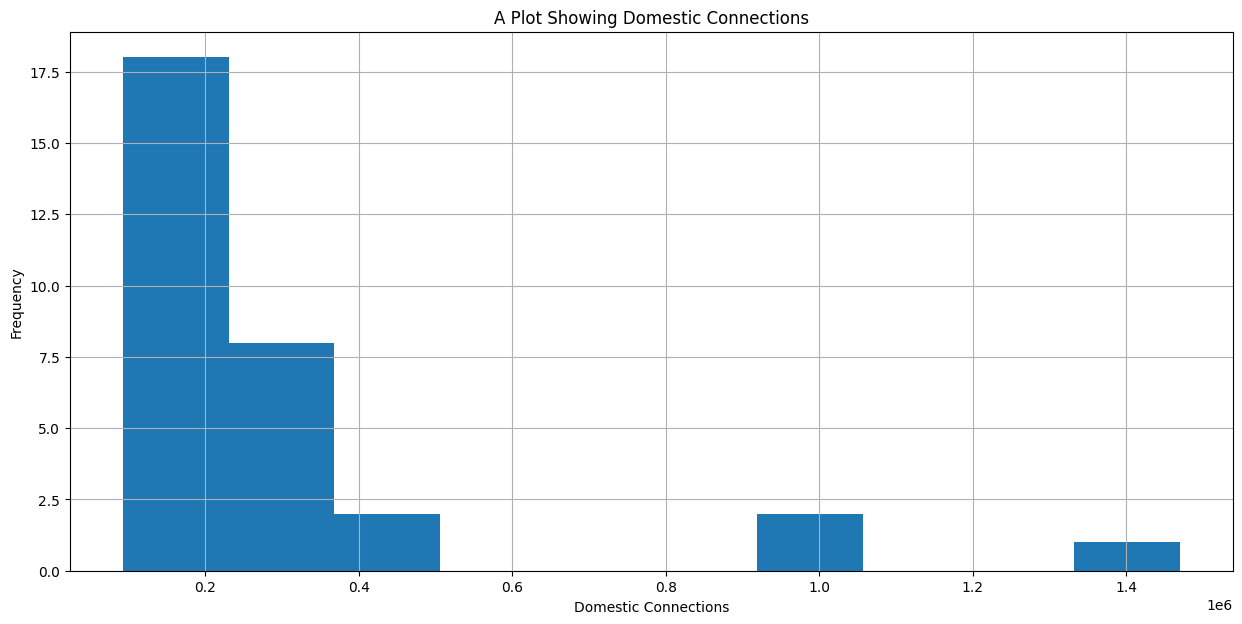

In [18]:
plt.figure(figsize=(15,7))
df['Domestic Connections'].hist()
plt.xlabel('Domestic Connections')
plt.ylabel('Frequency')
plt.title('A Plot Showing Domestic Connections')
plt.show

In [19]:
df.head()

,Districts,Domestic Connections,Industrial Connections,Agriculture Connections,Commercial Connections,Other Connections
0,ADILABAD,151936,1074,17948,14641,3302
1,BHADRADRI,272987,1396,29951,25990,5911
2,HYDERABAD,1469633,13041,86,324781,18987
3,JAGTIAL,267097,2132,113165,23109,6499
4,JANGAON,148566,1536,80002,11366,4432


<function matplotlib.pyplot.show(close=None, block=None)>

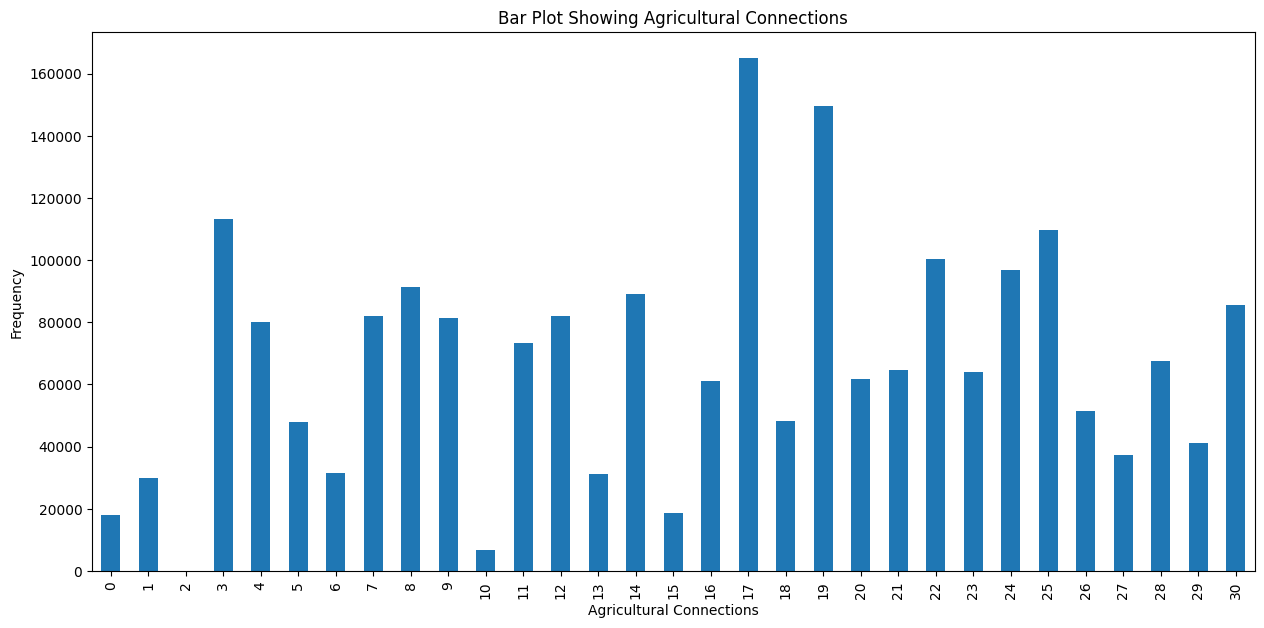

In [20]:
plt.figure(figsize=(15,7))
df['Agriculture Connections'].plot(kind='bar')
plt.title('Bar Plot Showing Agricultural Connections')
plt.xlabel('Agricultural Connections')
plt.ylabel('Frequency')
plt.show

In [21]:
df.head()

,Districts,Domestic Connections,Industrial Connections,Agriculture Connections,Commercial Connections,Other Connections
0,ADILABAD,151936,1074,17948,14641,3302
1,BHADRADRI,272987,1396,29951,25990,5911
2,HYDERABAD,1469633,13041,86,324781,18987
3,JAGTIAL,267097,2132,113165,23109,6499
4,JANGAON,148566,1536,80002,11366,4432


<function matplotlib.pyplot.show(close=None, block=None)>

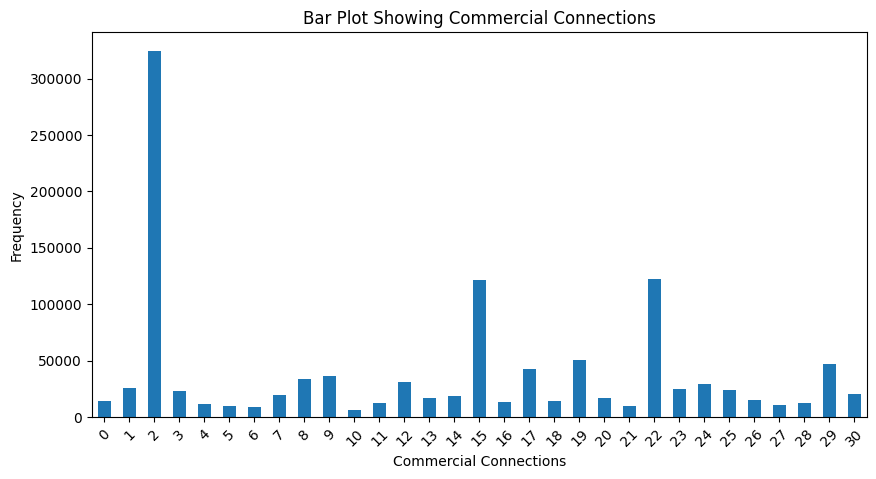

In [22]:
plt.figure(figsize=(10,5))
df['Commercial Connections'].plot(kind='bar')
plt.xlabel('Commercial Connections')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Bar Plot Showing Commercial Connections')
plt.show

In [23]:
df.head()

,Districts,Domestic Connections,Industrial Connections,Agriculture Connections,Commercial Connections,Other Connections
0,ADILABAD,151936,1074,17948,14641,3302
1,BHADRADRI,272987,1396,29951,25990,5911
2,HYDERABAD,1469633,13041,86,324781,18987
3,JAGTIAL,267097,2132,113165,23109,6499
4,JANGAON,148566,1536,80002,11366,4432


In [24]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<function matplotlib.pyplot.show(close=None, block=None)>

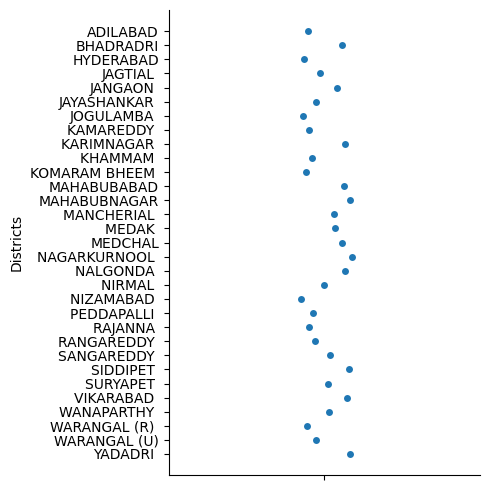

In [25]:
sns.catplot(df['Districts'])
plt.show

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<function matplotlib.pyplot.show(close=None, block=None)>

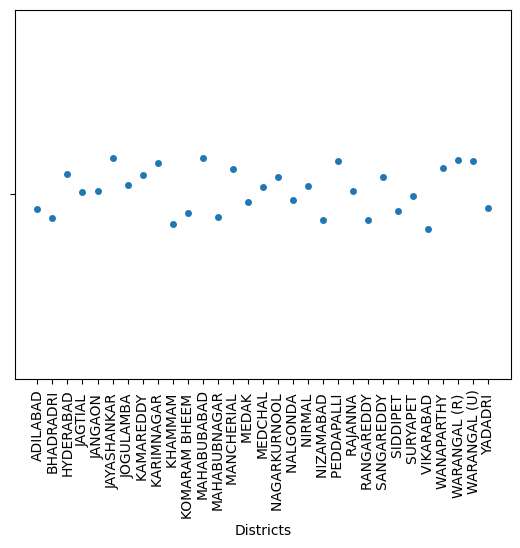

In [26]:
sns.stripplot(df,x= 'Districts')
plt.xticks(rotation=90)
plt.show

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<function matplotlib.pyplot.show(close=None, block=None)>

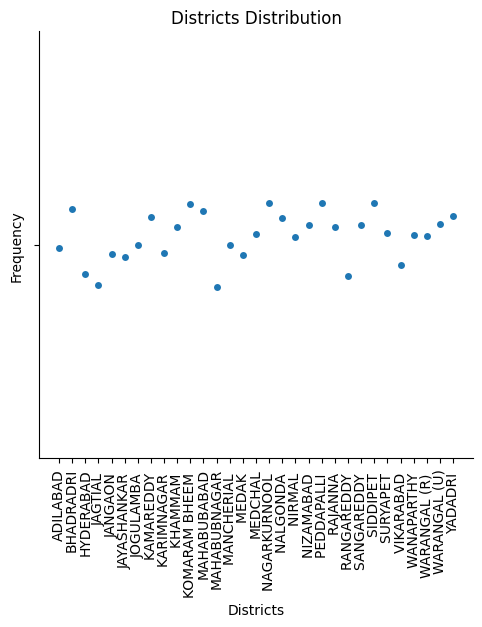

In [27]:
sns.catplot(df,x='Districts')
plt.xlabel('Districts')
plt.ylabel('Frequency')
plt.title('Districts Distribution')
plt.xticks(rotation=90)
plt.show

In [28]:
df.head()

,Districts,Domestic Connections,Industrial Connections,Agriculture Connections,Commercial Connections,Other Connections
0,ADILABAD,151936,1074,17948,14641,3302
1,BHADRADRI,272987,1396,29951,25990,5911
2,HYDERABAD,1469633,13041,86,324781,18987
3,JAGTIAL,267097,2132,113165,23109,6499
4,JANGAON,148566,1536,80002,11366,4432


<function matplotlib.pyplot.show(close=None, block=None)>

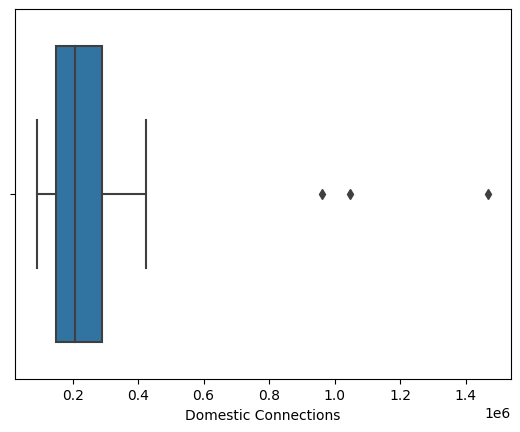

In [29]:
sns.boxplot(df,x='Domestic Connections')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

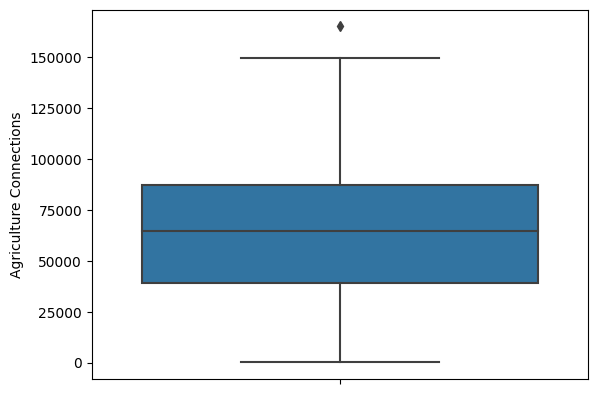

In [30]:
sns.boxplot(df,y='Agriculture Connections')
plt.show